# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
def weather(city, units='imperial'):
    base_url="http://api.openweathermap.org/data/2.5/weather?"
    q_url = f"{base_url}appid={api_key}&units={units}&q={city}" 
    data = requests.get(q_url).json()
    return data

In [47]:
weathers_df = pd.DataFrame({"City": cities})
weathers_df["Lat"] = ""
weathers_df["Lng"] = ""
weathers_df["Max Temp"] = ""
weathers_df["Humidity"] = ""
weathers_df["Cloudiness"] = ""
weathers_df["Wind Speed"] = ""
weathers_df["Country"] = ""
weathers_df["Date"] = ""

In [48]:
count = 0

for index, row in weathers_df.iterrows():
    data = weather(city)
    city=row["City"]
    try:
        weathers_df.loc[index, "Lat"] = data['coord']['lat']
        weathers_df.loc[index, "Lng"] = data['coord']['lon']
        weathers_df.loc[index, "Max Temp"] = data['main']['temp_max']
        weathers_df.loc[index, "Humidity"] = data['main']['humidity']
        weathers_df.loc[index, "Cloudiness"] = data['clouds']['all']
        weathers_df.loc[index, "Wind Speed"] = data['wind']['speed']
        weathers_df.loc[index, "Country"] = data['sys']['country']
        weathers_df.loc[index, "Date"] = data['dt']
        count += 1
        print(f"Processing city number{count} :  {city} ")
    except:
        print(f"{city} not found... skipping.....")
        pass
     

Processing city number1 :  khatanga 
Processing city number2 :  kidal 
Processing city number3 :  mulungu 
Processing city number4 :  poum 
Processing city number5 :  atambua 
Processing city number6 :  ushuaia 
Processing city number7 :  denpasar 
Processing city number8 :  hermanus 
Processing city number9 :  vaini 
Processing city number10 :  hobart 
Processing city number11 :  tuktoyaktuk 
Processing city number12 :  pangnirtung 
Processing city number13 :  gornorechenskiy 
Processing city number14 :  illoqqortoormiut 
bundaberg not found... skipping.....
Processing city number15 :  barentsburg 
xinqing not found... skipping.....
Processing city number16 :  hambantota 
Processing city number17 :  saint-joseph 
Processing city number18 :  beira 
Processing city number19 :  butaritari 
Processing city number20 :  brentwood 
Processing city number21 :  puerto del rosario 
Processing city number22 :  port alfred 
Processing city number23 :  qaanaaq 
Processing city number24 :  ambon 
P

Processing city number197 :  toliary 
belushya guba not found... skipping.....
kisangani not found... skipping.....
Processing city number198 :  nelson bay 
Processing city number199 :  souillac 
Processing city number200 :  college 
Processing city number201 :  labuan 
Processing city number202 :  husavik 
Processing city number203 :  ribeira grande 
Processing city number204 :  wanxian 
Processing city number205 :  uwayl 
hami not found... skipping.....
Processing city number206 :  verkhnevilyuysk 
Processing city number207 :  brae 
Processing city number208 :  chumikan 
Processing city number209 :  mahemdavad 
Processing city number210 :  nemuro 
Processing city number211 :  fortuna 
Processing city number212 :  miragoane 
Processing city number213 :  port hedland 
Processing city number214 :  havelock 
Processing city number215 :  longlac 
nikolskoye not found... skipping.....
Processing city number216 :  tuatapere 
Processing city number217 :  kihei 
Processing city number218 :  l

Processing city number389 :  farafangana 
Processing city number390 :  la ronge 
Processing city number391 :  juneau 
Processing city number392 :  koslan 
Processing city number393 :  lufilufi 
Processing city number394 :  victor harbor 
Processing city number395 :  kungurtug 
Processing city number396 :  laje 
Processing city number397 :  saint-louis 
Processing city number398 :  isangel 
Processing city number399 :  rafsanjan 
Processing city number400 :  mitsamiouli 
Processing city number401 :  khandyga 
Processing city number402 :  puerto penasco 
Processing city number403 :  russell 
Processing city number404 :  puerto ayacucho 
Processing city number405 :  bairiki 
Processing city number406 :  tanete 
Processing city number407 :  leningradskiy 
Processing city number408 :  oranjemund 
Processing city number409 :  tubruq 
kiunga not found... skipping.....
Processing city number410 :  necochea 
Processing city number411 :  monte gordo 
Processing city number412 :  auki 
Processing

In [49]:
weathers_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,46.68,113.28,31.01,80,0,7.61,MN,1602723331
1,kidal,71.97,102.5,18.07,97,100,11.5,RU,1602723726
2,mulungu,18.44,1.41,86.34,14,0,9.28,ML,1602723726
3,poum,-7.02,-35.46,77,83,40,6.93,BR,1602723726
4,atambua,-20.23,164.02,75.56,81,100,5.79,NC,1602723727


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
weathers_df.to_csv("cities.csv")

In [84]:
cities_pd = pd.read_csv("cities.csv")

In [93]:
cleaned_cities_pd = cities_pd.dropna(how="any")

In [121]:
stats_df = cleaned_cities_pd[["Lat"]].describe()
stats_df["Lng"] = cleaned_cities_pd[["Lng"]].describe()
stats_df["Mat Temp"] = cleaned_cities_pd[["Max Temp"]].describe()
stats_df["Humidity"] = cleaned_cities_pd[["Humidity"]].describe()
stats_df["Cloudiness"] = cleaned_cities_pd[["Cloudiness"]].describe()
stats_df["Wind Speed"] = cleaned_cities_pd[["Wind Speed"]].describe()
stats_df

,Lat,Lng,Mat Temp,Humidity,Cloudiness,Wind Speed
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,21.271843,15.593596,61.585778,71.166369,47.203936,8.199660
std,32.757858,89.643369,18.678529,21.330877,39.949447,5.613301
min,-54.800000,-175.200000,12.540000,1.000000,0.000000,0.160000
25%,-5.285000,-65.405000,48.000000,59.000000,1.000000,3.770000
50%,27.920000,20.970000,66.000000,77.000000,40.000000,6.930000
75%,47.270000,90.930000,77.360000,88.000000,90.000000,11.410000
max,78.220000,179.320000,98.600000,100.000000,100.000000,30.290000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [126]:
#  Get the indices of cities that have humidity over 100%.
rain =cleaned_cities_pd["Humidity"].max()
rain                    

100.0

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [149]:
pd.to_numeric(cleaned_cities_pd["Lat"])

0      46.68
1      71.97
2      18.44
3      -7.02
4     -20.23
       ...  
607     4.95
608    61.99
609   -27.37
611    49.50
612    34.69
Name: Lat, Length: 559, dtype: float64

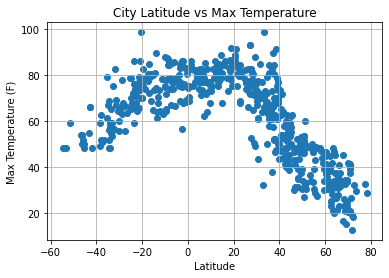

In [150]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Max Temp"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

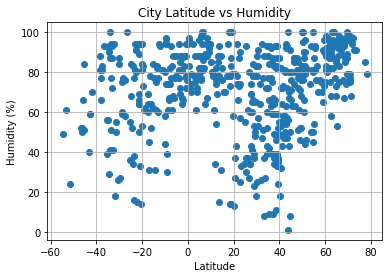

In [131]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Humidity"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

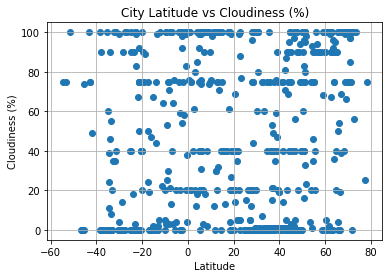

In [129]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Cloudiness"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

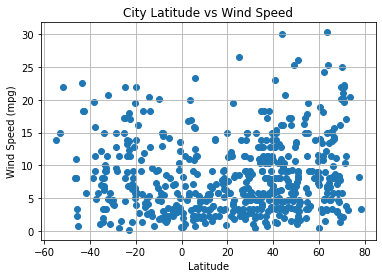

In [130]:
fig, ax=plt.subplots(1)
x_values = cleaned_cities_pd["Lat"]
y_values = cleaned_cities_pd["Wind Speed"]
plt.scatter(x_values, y_values)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

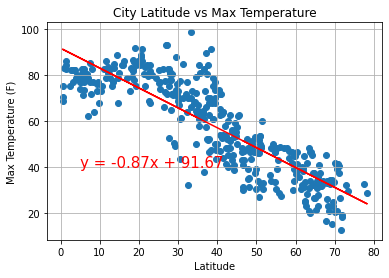

In [224]:
fig, ax=plt.subplots()
pd.to_numeric(cleaned_cities_pd["Lat"])
North_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]>0,:]
x_values = North_df["Lat"]
y_values = North_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, color='red')

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(5,40), fontsize=15,color="red")
plt.grid()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

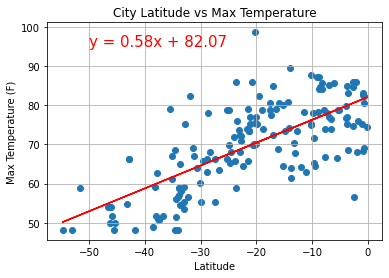

In [214]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Max Temp"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,95), fontsize=15,color="red")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

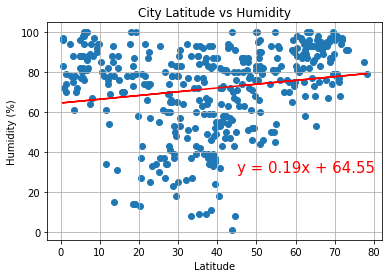

In [218]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Humidity"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,30), fontsize=15,color="red")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

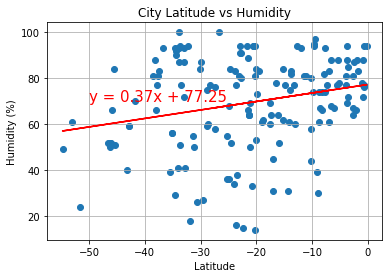

In [219]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Humidity"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,70), fontsize=15,color="red")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

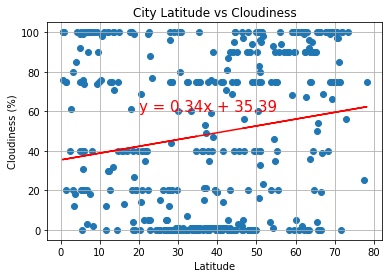

In [220]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Cloudiness"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,60), fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

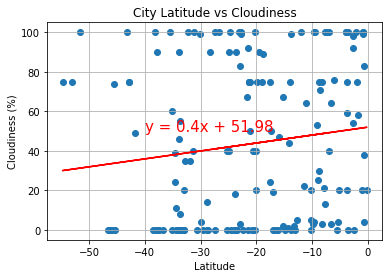

In [221]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Cloudiness"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,50), fontsize=15,color="red")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

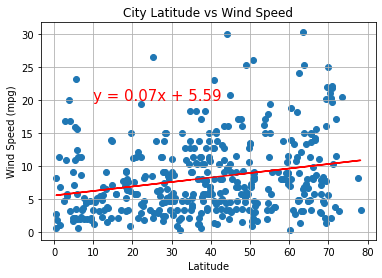

In [222]:
fig, ax=plt.subplots()

x_values = North_df["Lat"]
y_values = North_df["Wind Speed"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,20), fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

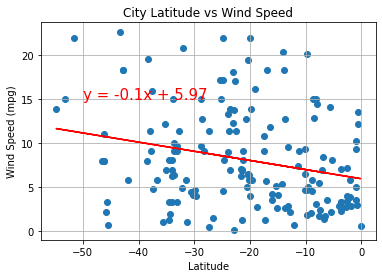

In [223]:
fig, ax=plt.subplots()
South_df = cleaned_cities_pd.loc[cleaned_cities_pd["Lat"]<0,:]
x_values = South_df["Lat"]
y_values = South_df["Wind Speed"]
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,15), fontsize=15,color="red")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()